In [120]:
from PIL import Image, ImageDraw
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

import os

In [78]:
os.listdir('data/simple data')

['pool_ball [edge_detected_image].png',
 'pool_ball [input_image].png',
 'simple_shape_01.png']

In [169]:
#Load Image:
input_image = Image.open("data/simple data/simple_shape_01.png")
input_pixels = input_image.load()
width, height = input_image.width, input_image.height

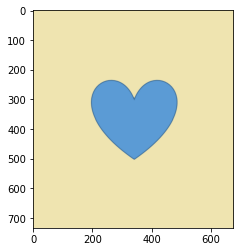

(676, 734)


In [170]:
#Show the input image
plt.figure()
plt.imshow(input_image) 
plt.show() 
print(input_image.size)

In [171]:
# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

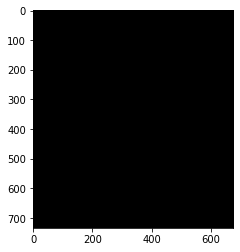

In [172]:
plt.imshow(output_image) 
plt.show() 

## Grayscale = (R+G+B)/3

In [173]:
# Convert to grayscale
# grayscale = (R+G+B)/3
intensity = np.zeros((width, height))
for x in range(width):
    for y in range(height):
        intensity[x, y] = sum(input_pixels[x, y]) / 3

## Compute convolution between intensity and kernels

In [174]:
# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx = intensity[x + 1, y] - intensity[x - 1, y]
        magy = intensity[x, y + 1] - intensity[x, y - 1]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))

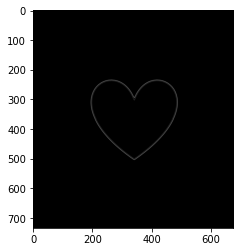

In [175]:
plt.imshow(output_image) 
plt.show()

# Let's test on a real data.

In [160]:
def edge_detection(input_image):
    
    # Create output image
    output_image = Image.new("RGB", input_image.size)
    draw = ImageDraw.Draw(output_image)

    # Convert to grayscale
    intensity = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            intensity[x, y] = sum(input_pixels[x, y]) / 3

    # Compute convolution between intensity and kernels
    for x in range(1, input_image.width - 1):
        for y in range(1, input_image.height - 1):
            magx = intensity[x + 1, y] - intensity[x - 1, y]
            magy = intensity[x, y + 1] - intensity[x, y - 1]

            # Draw in black and white the magnitude
            color = int(sqrt(magx**2 + magy**2))
            draw.point((x, y), (color, color, color))
            
    return output_image;

In [161]:
## Show the image
def show_image(image):
    plt.imshow(image) 
    plt.show() 
    print(image.size)

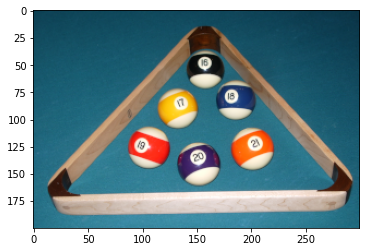

(300, 200)


In [162]:
## Input image
real_input_image = Image.open("data/simple data/pool_ball [input_image].png")
show_image(real_input_image)

In [163]:
#detect the edge
detected_image = edge_detection(real_input_image)

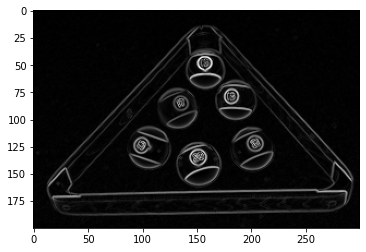

(300, 200)


In [166]:
show_image(detected_image)

In [176]:
detected_image.save("data/simple data/pool_ball [edge_detected_image].png")